<h1>Maternal Health Risk Data Set</h1>
<h2> FINAL PROJECT ON MACHINE LEARNING MODEL</h2>
<h2>PROGRAMMING IN PYTHON</h2>
<h2> SECTION:A </h2>
 

In [15]:
#importing necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

<h3>Dataset reference</h3>

https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set


In [16]:
#importing the datasets from csv file in a dataframe and showing

dF=pd.read_csv('r_dataset.csv')
dF

,AGE,SBP,DBP,BS,BTM,HRT,RLV
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


<h2>Total Dataset Information</h2>

The data was colleted from Maternal Health Risk Data Set . Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system. The Age, Systolic Blood Pressure as SystolicBP, Diastolic BP as DiastolicBP, Blood Sugar as BS, Body Temperature as BodyTemp, HeartRate and RiskLevel. All these are the responsible and significant risk factors for maternal mortality, that is one of the main concern of SDG of UN.
    
   Attribute information:
 1. AGE: Age-Any ages in years when a women during pregnant.
 2.SBP: SystolicBP-Upper value of Blood Pressure in mmHg,another significant attribute during pregnancy.
 3.DBP: DiastolicBP-Lower value of Blood Pressure in mmHg,another significant attribute during pregnancy.
 4.BS:  Blood glucose levels is in terms of a molar concentration, mmol/L.
 5.BTM: BodyTemprature troughout the pregnancy.
 6.HRT: HeartRate-A normal resting heart rate in beats per minute.
 7.RLV: Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

 Relevant Papers:

1. Ahmed M., Kashem M.A., Rahman M., Khatun S. (2020) Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT). In: Kasruddin Nasir A. et al. (eds) InECCE2019. Lecture Notes in Electrical Engineering, vol 632. Springer, Singapore. [Web Link]
2. IoT based Risk Level Prediction Model for Maternal Health Care in the Context of Bangladesh, STI-2020, [under publication in IEEE]


<h3> Cleaning the Dataset </h3>

This dataset will be checked now to see if their is any null values


In [17]:
#Exploring the Details of the dataset
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     1014 non-null   int64  
 1   SBP     1014 non-null   int64  
 2   DBP     1014 non-null   int64  
 3   BS      1014 non-null   float64
 4   BTM     1014 non-null   float64
 5   HRT     1014 non-null   int64  
 6   RLV     1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [18]:
#Replace null values with 'null'

new_dF = dF.fillna('null')
new_dF

,AGE,SBP,DBP,BS,BTM,HRT,RLV
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [19]:
new_dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     1014 non-null   int64  
 1   SBP     1014 non-null   int64  
 2   DBP     1014 non-null   int64  
 3   BS      1014 non-null   float64
 4   BTM     1014 non-null   float64
 5   HRT     1014 non-null   int64  
 6   RLV     1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


<h3> Exploratory Data Analysis </h3>

In [20]:
#Returning All the keys from the dataset
new_dF.keys()

Index(['AGE', 'SBP', 'DBP', 'BS', 'BTM', 'HRT', 'RLV'], dtype='object')

In [21]:
#Replacing the Target Column True/False value with high/low/mild blood suger levels information
new_dF['RLV']=new_dF['RLV'].replace(['high risk','mid risk','low risk'],['True','True or False','False'])
new_dF

,AGE,SBP,DBP,BS,BTM,HRT,RLV
0,25,130,80,15.0,98.0,86,True
1,35,140,90,13.0,98.0,70,True
2,29,90,70,8.0,100.0,80,True
3,30,140,85,7.0,98.0,70,True
4,35,120,60,6.1,98.0,76,False
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,True
1010,55,120,90,18.0,98.0,60,True
1011,35,85,60,19.0,98.0,86,True
1012,43,120,90,18.0,98.0,70,True


The risk factors are determined by BS(blood glucose) and changing high risk, low risk and mild risk to a true,false output, in maternal health cares from the rural areas of Bangladesh.

Text(0.5, 1.0, 'Number of women at maternal health risk')

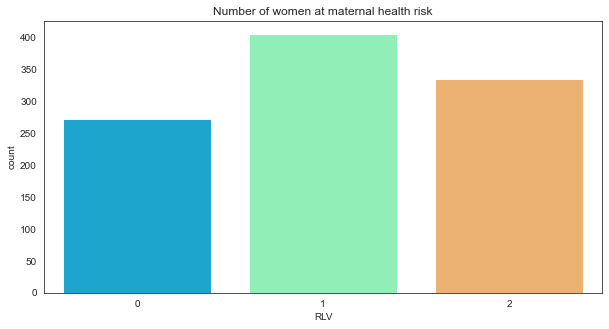

In [97]:
# showing the number of woman at  diffrent risk levels 
#data distribution of the target variable(RLV)

plt.figure(figsize=(10,5))
sns.countplot(x='RLV', data=dF, palette='rainbow')
plt.title('Number of women at maternal health risk')    


<h3> Data exploration Models </h3>


Text(0.5, 1.0, 'Swarmplot on diffrent glucouse level and health risk')

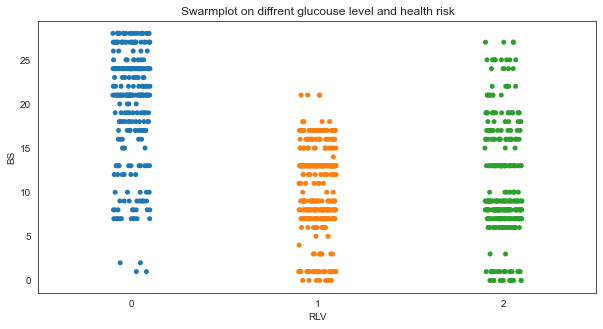

In [92]:
#plotting the Data of the blood glucouse levels and the level of health risk 
sns.set_style("white")
plt.figure(figsize=(10,5))
sns.stripplot(x='RLV', y='BS', data=dF)
plt.title("Swarmplot on diffrent glucouse level and health risk")


Text(0.5, 1.0, 'Scatter plot on the age based on suger levels')

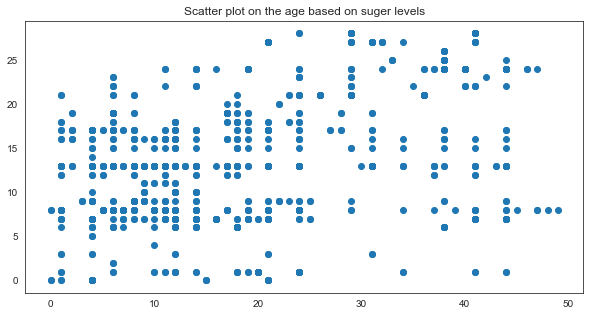

In [90]:
#plotting the Data if women with high glucouse level and their risk level.
plt.figure(figsize=(10,5))
plt.scatter(dF['AGE'],dF['BS'])
plt.title("Scatter plot on the age based on suger levels")

Text(0.5, 1.0, 'Scatter plot on the age and risk level during maternity')

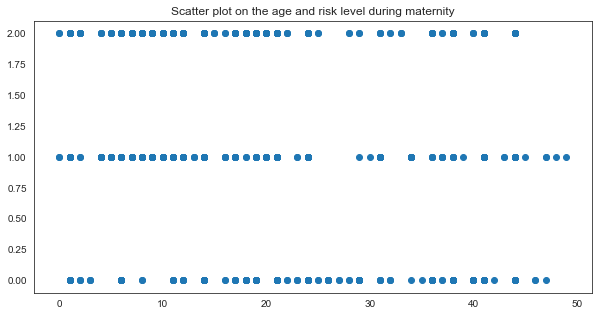

In [95]:
#plotting data to compare the ages and risk rate
plt.figure(figsize=(10,5))
plt.scatter (dF['AGE'],dF['RLV'])

plt.title("Scatter plot on the age and risk level during maternity")

<h3> Outcome from the plotting</h3>

Here, thought the ploting of the data based on the risk levels and the glucous level in the blood it can be determined that women with higher blood glucose level have a higher risk than a woman with lower blood glucouse. Then the age and risk level of the womens were taken ito considation for a generating a idea with the help of the plotting.


<h2> Creating the Model </h2>

In [60]:
#counting the numbers of the womens at high,low and mild risk
dF.groupby('RLV').size()

RLV
high risk    272
low risk     406
mid risk     336
dtype: int64

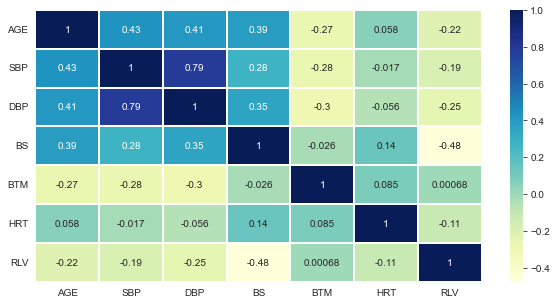

In [91]:
#creating the correlation Matrix for the whole Dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

labelencoder=LabelEncoder() #it is used to convert the categorical data into machine readable form
for column in dF.columns:
    dF[column] = labelencoder.fit_transform(dF[column])


plt.figure(figsize=(10,5))
sns.heatmap(dF.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
 

<h3>Total 2 columns have been selected from the dataset based on correlation</h3>

<b>SBP(Systolic blood pressure)</b>-systolic blood pressure of 160 mm or higher can produce complication in maternal health. so, The women are at higher risk.
This column is important information for the well-being and health of maternal health and predicting future risk patterns.

<b>DBP(Diastolic blood pressure)</b>-diastolic blood pressure of 110 mm Hg or higher can produce higher risk level during maternal health.
This column is important information for the well-being and health of maternal health and predicting future risk patterns.

In [66]:
#creating the updated metrix using important colums
up_df=dF[['SBP', 'DBP']]
up_df


,SBP,DBP
0,15,10
1,17,13
2,7,7
3,17,11
4,13,2
...,...,...
1009,13,2
1010,13,13
1011,6,2
1012,13,13


In [67]:
#seprating the target variable
y=dF['RLV']
y

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RLV, Length: 1014, dtype: int32

<p> Total 5 algorithms have been used to test the accuracy of this model. They are listed below:</p> 
    <li> naive bayes</li>
    <li> knn </li>
	<li> decision tree </li>
	<li>logistic regression</li>
	 <li> svm</li>

In [75]:
#using data splitting functions from scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(up_df, y, test_size = 0.3, random_state = 16)
print("X_training shape: ", X_train.shape)
print("X_testing shape: ", X_test.shape)


X_training shape:  (709, 2)
X_testing shape:  (305, 2)


<h3>Traing and Testing Dataset</h3>

<b>Training</b>- 709 out of 1014 data has been choosen for training the model <br>
<b>Testing</b>-  305 out of 1014 data has been choosen for the testing model.

In [77]:
#Naive bayes
# importing the necessary package to use the naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_prediction_nb = model_nb.predict(X_test)
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print('The accuracy of the model based on Naive Bayes Algorithm is {}%'.format(score_nb*100))
perc.append(score_nb)

The accuracy of the model based on Naive Bayes Algorithm is 50.82%


In [79]:
#Knn
# importing the necessary package to use the knn algorithm
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(X_train, y_train) 
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print('The accuracy of the model based on K Nearest Neighbour Algorithm is {}%'.format(score_knn*100))
perc.append(score_knn)

The accuracy of the model based on K Nearest Neighbour Algorithm is 45.57%


In [84]:
# importing the necessary package to use the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print('The accuracy of the model based on Decision Tree Algorithm is {}%'.format(score_dt*100))
perc.append(score_dt)

The accuracy of the model based on Decision Tree Algorithm is 58.36%


In [80]:
#logistic regression algorithm
# importing the necessary package to use the logistic regression algorithm
from sklearn.linear_model import LogisticRegression 
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_prediction_lr = model_lr.predict(X_test) 
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print('The accuracy of the model based on Logistic Regression Algorithm is {}%'.format(score_lr*100))
perc.append(score_lr)

The accuracy of the model based on Logistic Regression Algorithm is 55.74%


In [83]:
#svm 
# importing the necessary package to use the svm algorithm
from sklearn import svm 
model_svm = svm.SVC() 
model_svm.fit(X_train, y_train) 
y_prediction_svm = model_svm.predict(X_test) 
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print('The accuracy of the model based on Support Vector Machine Algorithm is {}%'.format(score_svm*100))
perc.append(score_svm)

The accuracy of the model based on Support Vector Machine Algorithm is 58.69%


In [82]:
max=perc[0]
for i in range(0,len(perc),+1):
    if perc[i]>=max:
        max=perc[i]
        
print('The maximum accuracy from all these algorithm is '+str(max))  
   

The maximum accuracy from all these algorithm is 0.5869


<h2> Model Accuracy</h2>

This model has an accuracy of 50.82%. Based on Support Naive Bayes Algorithm and 58% based on svm algorithm,decision tree Algorithm.

<h2>Discussion</h2>

This model is created based on the Maternal Health Risk Data Set which has the data of high,low and mild risk. This model has an accuracy of 50.82%. Which is not the best result or outcome in this data set which has 1014 numbers of instances. This desions where made by diffrent modeles chossing the most relevent data through diffrent plotting and graphs. still as the accuracy is not even near the 70% it might not be an ideal result. which might be the solved if their where more attributes and data sets. If we had more columns which had more correlatation with the other variable the prediction could have been more better. As, it was based on a real life dataset, the prediction can also be called a realistic if it predicts the correct result.  